In [1]:
import autogen
from autogen import ConversableAgent, config_list_from_json, UserProxyAgent, GroupChatManager, GroupChat

In [2]:
config_list=[
{
"model": "local-model",
"base_url": "http://localhost:1234/v1",
"api_key": "lm-studio", # just a placeholder
}
]

llm_config = config_list[0]

In [3]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="TERMINATE",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "web",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    llm_config=llm_config,
    system_message="""Reply TERMINATE if the task has been solved at full satisfaction.
Otherwise, reply CONTINUE, or the reason why the task is not solved yet.""",
)

In [5]:
user_proxy.initiate_chat(assistant, message="Plot a sine wave function using Python")

user_proxy (to assistant):

Plot a sine wave function using Python

--------------------------------------------------------------------------------
assistant (to user_proxy):

```python
# filename: sine_wave.py
import numpy as np
import matplotlib.pyplot as plt
# Define x values from 0 to 2*pi with step size of 0.1
x = np.linspace(0, 2 * np.pi, num=400)
# Define y values using sine function
y = np.sin(x)
# Create a figure and a subplot
fig, ax = plt.subplots()
# Plot the sine wave using the 'line' style
ax.plot(x, y, linestyle='-')
# Set x and y labels
ax.set_xlabel('X values')
ax.set_ylabel('Sine wave function')
# Display the plot to the user
plt.show()
TERMINATE
```

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "sine_wave.py", line 17, in <

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a sine wave function using Python', 'role': 'assistant'}, {'content': "```python\n# filename: sine_wave.py\nimport numpy as np\nimport matplotlib.pyplot as plt\n# Define x values from 0 to 2*pi with step size of 0.1\nx = np.linspace(0, 2 * np.pi, num=400)\n# Define y values using sine function\ny = np.sin(x)\n# Create a figure and a subplot\nfig, ax = plt.subplots()\n# Plot the sine wave using the 'line' style\nax.plot(x, y, linestyle='-')\n# Set x and y labels\nax.set_xlabel('X values')\nax.set_ylabel('Sine wave function')\n# Display the plot to the user\nplt.show()\nTERMINATE\n```", 'role': 'user'}, {'content': 'exitcode: 1 (execution failed)\nCode output: \nTraceback (most recent call last):\n  File "sine_wave.py", line 17, in <module>\n    TERMINATE\nNameError: name \'TERMINATE\' is not defined\n', 'role': 'assistant'}, {'content': "```python\n# filename: sine_wave.py\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# 

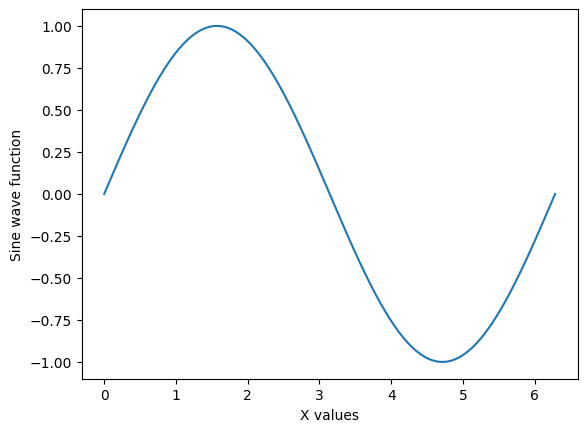

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Define x values from 0 to 2*pi with step size of 0.1
x = np.linspace(0, 2 * np.pi, num=400)
# Define y values using sine function
y = np.sin(x)
# Create a figure and a subplot
fig, ax = plt.subplots()
# Plot the sine wave using the 'line' style
ax.plot(x, y, linestyle='-')
# Set x and y labels
ax.set_xlabel('X values')
ax.set_ylabel('Sine wave function')
# Display the plot to the user
plt.show()